# Distributions, Contours and Everything Else

In [1]:
import numpy as np
np.random.seed(1337)

In [2]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline
plt.style.use('ggplot')

In [23]:
num_bins = 50  # number of bins in each dimension  Try: 5, 20, 50, 500 
num_samples = 10000000

data = 100 + 10 * np.random.randn(num_samples, 2)  # generate 100000 2-d random data points
joint_probs, edges = np.histogramdd(data, bins=num_bins)

edges = np.array(edges)[:,1:]

In [24]:
print(edges) 

[[ 48.23506416  50.47655146  52.71803876  54.95952606  57.20101336
   59.44250066  61.68398796  63.92547526  66.16696256  68.40844986
   70.64993716  72.89142446  75.13291176  77.37439906  79.61588636
   81.85737366  84.09886095  86.34034825  88.58183555  90.82332285
   93.06481015  95.30629745  97.54778475  99.78927205 102.03075935
  104.27224665 106.51373395 108.75522125 110.99670855 113.23819585
  115.47968315 117.72117045 119.96265775 122.20414504 124.44563234
  126.68711964 128.92860694 131.17009424 133.41158154 135.65306884
  137.89455614 140.13604344 142.37753074 144.61901804 146.86050534
  149.10199264 151.34347994 153.58496724 155.82645454 158.06794184]
 [ 45.21047124  47.4436475   49.67682376  51.91000002  54.14317628
   56.37635254  58.60952879  60.84270505  63.07588131  65.30905757
   67.54223383  69.77541009  72.00858635  74.24176261  76.47493887
   78.70811512  80.94129138  83.17446764  85.4076439   87.64082016
   89.87399642  92.10717268  94.34034894  96.5735252   98.806

In [25]:
data.shape

(10000000, 2)

In [26]:
joint_probs.shape

(50, 50)

In [27]:
joint_probs

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [28]:
cut_point = 2


X_vals = np.array( joint_probs[cut_point] )     
X_vals /= X_vals.sum() 

# Brain twister: why do we need the cast to np array here? 
# Hint: Leads to a HUGE bug in analysis if you don't. Can you figure out why? 

# Try to figure it out. If you can't post in the Q&A and we will discuss  ***** 

Y_vals = np.array( joint_probs[:, cut_point]  ) 
Y_vals /= Y_vals.sum()

print("Cut X and Y on: ", cut_point)

Cut X and Y on:  2


<ipython-input-28-bd7e43d54ba9>:13: RuntimeWarning: invalid value encountered in true_divide
  Y_vals /= Y_vals.sum()


In [29]:
print(edges[0])
print(X_vals)
print(Y_vals)

[ 48.23506416  50.47655146  52.71803876  54.95952606  57.20101336
  59.44250066  61.68398796  63.92547526  66.16696256  68.40844986
  70.64993716  72.89142446  75.13291176  77.37439906  79.61588636
  81.85737366  84.09886095  86.34034825  88.58183555  90.82332285
  93.06481015  95.30629745  97.54778475  99.78927205 102.03075935
 104.27224665 106.51373395 108.75522125 110.99670855 113.23819585
 115.47968315 117.72117045 119.96265775 122.20414504 124.44563234
 126.68711964 128.92860694 131.17009424 133.41158154 135.65306884
 137.89455614 140.13604344 142.37753074 144.61901804 146.86050534
 149.10199264 151.34347994 153.58496724 155.82645454 158.06794184]
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.11111111 0.11111111 0.
 0.11111111 0.11111111 0.         0.         0.11111111 0.11111111
 0.         0.11111111 0.11111111 0.

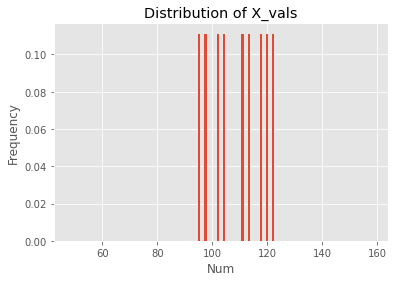

In [30]:
plt.bar(edges[0], X_vals)   #       
plt.ylabel('Frequency')
plt.xlabel('Num');
plt.title("Distribution of X_vals")
plt.show()

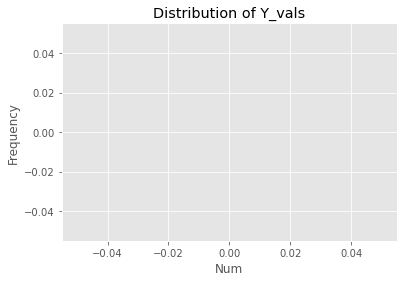

In [31]:
plt.bar(edges[1], Y_vals)   #       
plt.ylabel('Frequency')
plt.xlabel('Num');
plt.title("Distribution of Y_vals")
plt.show()

In [32]:
X = edges[0]
Y = edges[1]
X, Y = np.meshgrid(X, Y)

Z = joint_probs / joint_probs.sum()

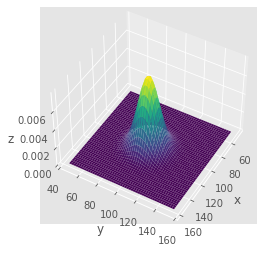

In [33]:
fig = plt.figure()
ax = plt.axes(projection='3d')

ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='viridis')

ax.view_init(45, 30)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');

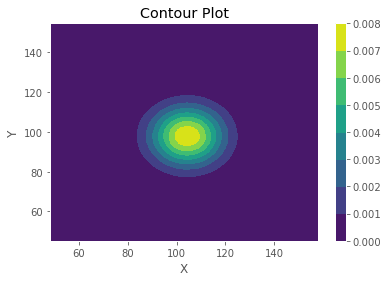

In [34]:
fig,ax = plt.subplots(1,1)
cp = ax.contourf(X, Y, Z)
fig.colorbar(cp) # Add a colorbar to a plot
ax.set_title('Contour Plot')
ax.set_xlabel('X')
ax.set_ylabel('Y')
plt.show()

## Dependence in Joints

In [35]:
import numpy as np

num_bins = 50   
num_samples = 10000

# Don't have to understand exactly how these values are being generated 
mean = [0, 0]
cov =  [[1, 0.9], 
        [0.9, 1.0]]  # diagonal covariance

data = 100 + 10 * np.random.multivariate_normal(mean, cov, num_samples)
joint_probs, edges = np.histogramdd(data, bins=num_bins)


edges = np.array(edges)[:,1:]
print(joint_probs)

[[0. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [36]:
cut_point = 14    # try 9, 2 and 14 

X_vals = np.array(joint_probs[cut_point])
X_vals /= X_vals.sum() 

Y_vals = np.array( joint_probs[:, cut_point]  ) 
Y_vals /= Y_vals.sum()

print("Cut X and Y on: ", cut_point)

Cut X and Y on:  14


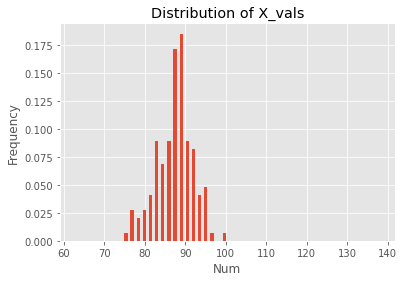

In [37]:
plt.bar(edges[0], X_vals)   #       
plt.ylabel('Frequency')
plt.xlabel('Num');
plt.title("Distribution of X_vals")
plt.show()

In [38]:
# plt.bar(edges[1], Y_vals)   #       Let's not do this for Y right now 
# plt.ylabel('Frequency')
# plt.xlabel('Num');
# plt.title("Distribution of Y_vals")
# plt.show()

In [39]:
X = edges[0]
Y = edges[1]
X, Y = np.meshgrid(X, Y)

Z = joint_probs / joint_probs.sum()

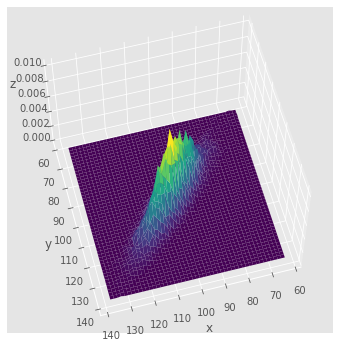

In [40]:
fig = plt.figure(figsize=(9, 6))
ax = plt.axes(projection='3d')

ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='viridis')

ax.view_init(60, 75)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');

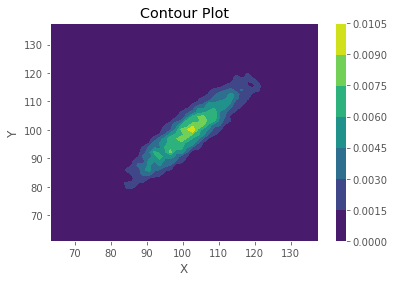

In [41]:
fig,ax = plt.subplots(1,1)
cp = ax.contourf(X, Y, Z)
fig.colorbar(cp) # Add a colorbar to a plot
ax.set_title('Contour Plot')
ax.set_xlabel('X')
ax.set_ylabel('Y')
plt.show()